### Term Project: Top 500 Movie Analysis - Milestone 5

Name: Gyaneshwar Kannur <br>

Course: DSC540Data Preparation (2223-1) <br>

Instructor: Catherine Williams <br>

##### Milestone 5

As part of previous milestones, we have read various dataset from difference sources like csv, web and API, and performed various transformations and store the output as csv files. Some of the transformations performed during previous milestones are mentioned below. 

Formatted Columns <br>
Duplicate check <br>
Renaming the columns with more meaningful names <br> 
Null or missing value checks <br>
Updating proper datatypes for each column <br>

For this milestone, we will create the pandas dataframes for all the csv files created in the previous milestones and load the data into SQLite database. Once the data is loaded into SQLite tables, we will access and combine the data using SQLite libaries and create various visualizations using python matplot library.

In [1]:
# Importing all the python libraries required for this assignment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##### Step 1: Reading data from csv files stored as part of previous milestones

In [2]:
## Reading the data from csv files into pandas dataframe

flat_file="./project_datasets/clean-500-movies.csv"
scraped_file="./project_datasets/clean-webscraped.csv"
api_file="./project_datasets/clean-api_data.csv"
csvData_df = pd.read_csv(flat_file)
web_scraped_df = pd.read_csv(scraped_file)
apiData_df = pd.read_csv(api_file)

##### Step 2: Formatting the column names

In [3]:
## Printing the column names for each of the dataframe

print("The column names present in csv dataset:")
print(csvData_df.columns)

print("The column names present in web dataset:")
print(web_scraped_df.columns)

print("The column names present in API dataset:")
print(apiData_df.columns)

The column names present in csv dataset:
Index(['rank', 'title', 'year', 'release_date', 'genre',
       'prod_cost_range_million', 'worldwide_gross_range_million',
       'domestic_gross_range_million', 'production_cost', 'domestic_gross',
       'worldwide_gross', 'opening_weekend', 'theaters', 'runtime'],
      dtype='object')
The column names present in web dataset:
Index(['movie_title', 'year', 'occasion', 'top_10_gross_in_millions',
       'overall_gross_in_millions', 'top10_wow_change', 'overall_wow_change',
       'top10_gross', 'overall_gross', 'num_releases', 'week_no', 'date'],
      dtype='object')
The column names present in API dataset:
Index(['title', 'release_year', 'genres', 'popularity', 'vote_average',
       'vote_count', 'original_title', 'overview', 'release_date',
       'original_language'],
      dtype='object')


##### Step 3: Additional transformation

In [4]:
## Calculating the count of records present in API dataset dataframe

# web_scraped_df.shape
webData_df = web_scraped_df.groupby(['movie_title','year']).agg({'overall_gross_in_millions':'sum','top_10_gross_in_millions':['sum'],'num_releases':'mean'})
webData_df.reset_index(drop=True)
# webData_df["id"] = webData_df.index

,overall_gross_in_millions,top_10_gross_in_millions,num_releases
,sum,sum,mean
0,264.18,234.86,69.000000
1,276.28,235.88,100.000000
2,374.10,354.56,124.000000
3,287.72,255.08,110.000000
4,233.42,208.96,122.000000
...,...,...,...
357,47.02,42.92,51.000000
358,739.20,708.56,98.500000
359,838.80,784.16,105.500000


In [5]:
webData_df.columns

MultiIndex([('overall_gross_in_millions',  'sum'),
            ( 'top_10_gross_in_millions',  'sum'),
            (             'num_releases', 'mean')],
           )

In [6]:
webData_df.rename(columns={"overall_gross_in_millions" : "overall_gross_in_millions",
                       "top_10_gross_in_millions" : "top_10_gross_in_millions",
                       "num_releases" : "num_releases"
                       }, inplace=True)

In [7]:
webData_df.head()

,,overall_gross_in_millions,top_10_gross_in_millions,num_releases
,,sum,sum,mean
movie_title,year,,,
1917,2020,264.18,234.86,69.0
2 guns,2013,276.28,235.88,100.0
22 jump street,2014,374.10,354.56,124.0
300: rise of an empire,2014,287.72,255.08,110.0
42,2013,233.42,208.96,122.0


In [8]:
#Observe some movies were released in multiple years probably they did not expect the profits during the first release
web_scraped_df[web_scraped_df.duplicated(subset=['movie_title'],keep=False)]


,movie_title,year,occasion,top_10_gross_in_millions,overall_gross_in_millions,top10_wow_change,overall_wow_change,top10_gross,overall_gross,num_releases,week_no,date
0,the hobbit: the desolation of smaug,2013,normal weekend,167.84,197.18,+24.5%,+37.3%,167837974,197177755,81,52,Dec 27-29
1,the hobbit: the desolation of smaug,2013,normal weekend,134.84,143.57,-2.6%,-2.8%,134837792,143571365,80,51,Dec 20-22
2,the hobbit: the desolation of smaug,2013,normal weekend,138.37,147.70,+64.8%,+56.2%,138369003,147702714,94,50,Dec 13-15
3,frozen,2013,Post-Thanksgiving,83.94,94.54,-55.7%,-54.6%,83941456,94535353,96,49,Dec 6-8
4,the hunger games: catching fire,2013,Thanksgiving 3-Day,189.48,208.13,-11.7%,-8.1%,189483142,208125032,104,48,Nov 29-Dec 1
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,avatar: the way of water,2023,normal weekend,62.26,72.46,-12%,-2.4%,62261869,72456636,63,4,Jan 27-29
1350,avatar: the way of water,2023,normal weekend,70.77,74.20,-28.4%,-28%,70766896,74204241,56,3,Jan 20-22
1351,avatar: the way of water,2023,normal weekend,98.90,103.02,-5.1%,-3%,98902358,103015764,48,2,Jan 13-15
1352,avatar: the way of water,2023,MLK wknd,119.96,124.78,-,-,119958973,124779112,43,2,Jan 13-16


In [9]:
## Showing record count and sample records from the dataframe after removing duplicates
apiData_df["release_year"] = apiData_df.release_year.astype('int64')
print("Total number of rows and columns present in api dataframe: {}".format(apiData_df.shape))

Total number of rows and columns present in api dataframe: (1781, 10)


In [10]:
apiData_df[apiData_df.duplicated(subset=['title'],keep=False)]

,title,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date,original_language
1,frozen,2013,"Animation,Family,Adventure,Fantasy",136.920,7.200,16539.0,Frozen,Young princess Anna of Arendelle dreams about ...,2013-11-20,en
2,frozen,2010,Thriller,21.316,6.000,1820.0,Frozen,When three skiers find themselves stranded on ...,2010-02-05,en
3,frozen,2005,Thriller,2.648,5.700,18.0,Frozen,It's two years since the mysterious disappeara...,2005-03-12,en
24,gravity,2013,"Science Fiction,Thriller,Drama",38.959,7.166,15309.0,Gravity,"Dr. Ryan Stone, a brilliant medical engineer o...",2013-10-03,en
25,gravity,2018,Documentary,0.446,0.000,0.0,Gravity,An electric compilation of footage cut to an e...,2018-01-01,en
...,...,...,...,...,...,...,...,...,...,...
1749,the little mermaid,1976,"Family,Fantasy,Music,Romance",2.592,6.400,21.0,Русалочка,A little Mermaid falls in love with a Prince w...,1976-12-17,ru
1750,the little mermaid,1998,Animation,1.863,5.800,4.0,The Little Mermaid,"The Princess Miranda lives with her father, Ki...",1998-01-01,en
1751,the little mermaid,1976,"Fantasy,Romance",6.032,6.800,41.0,Malá mořská víla,The little mermaid rescues a prince from drown...,1976-11-12,cs
1752,the little mermaid,2011,Fantasy,0.244,0.000,0.0,The Little Mermaid,The San Francisco Ballet's performance of John...,2011-11-01,en


In [11]:
## Calculating the count of records for remaining dataframes

print("Total number of rows and columns present in csv dataframe: {}".format(csvData_df.shape))
print("Total number of rows and columns present in web dataframe: {}".format(webData_df.shape))

Total number of rows and columns present in csv dataframe: (474, 14)
Total number of rows and columns present in web dataframe: (362, 3)


##### Step 4: Loading dataframe into SQLite database

In [12]:
## loading all the dataframes into database

with sqlite3.connect('mileston_5_movies.db') as conn:
    cursor = conn.cursor()
    csvData_df.to_sql("flat_file", conn, if_exists='replace', index=False)
    webData_df.to_sql("scraped_file", conn, if_exists='replace', index=True)
    apiData_df.to_sql("api_file", conn, if_exists='replace', index=False)

In [13]:
## Getting the list of tables and store it to list

result = conn.execute('''SELECT name FROM sqlite_master WHERE type='table';''')
tableList = []
for table_name in result:
    print(table_name[0])
    tableList.append(table_name[0])

webscraped_with_api
movies
flat_file
scraped_file
api_file


In [14]:
## Getting the list of columns for table

In [15]:
result = conn.execute('''PRAGMA table_info(scraped_file);''')
for r in result:
    print(r)

(0, 'movie_title', 'TEXT', 0, None, 0)
(1, 'year', 'INTEGER', 0, None, 0)
(2, "('overall_gross_in_millions', 'sum')", 'REAL', 0, None, 0)
(3, "('top_10_gross_in_millions', 'sum')", 'REAL', 0, None, 0)
(4, "('num_releases', 'mean')", 'REAL', 0, None, 0)


##### Step 5: Data validation for SQLite tables

In [16]:
## Check out the first few rows of each table
## Creating a function for this step

def df_head(tablename, nRows=5):
    '''Prints the first n rows of the table specified'''
    cursor.execute(f'''SELECT * FROM {tablename}''')
    for row in cursor.fetchall()[:nRows]:
        print(row)

In [17]:
## Calling the function for all the tables present in the tableList and printing 3 records

for i in tableList:
    print(f"Table: '{i}' - ")
    df_head(i, 3)
    print()

Table: 'webscraped_with_api' - 
('1917', 264.18, 234.86, 69.0, '1917', '1917', 2019, 'War,History,Thriller,Drama', 34.93, 7.991, 12411.0, '1917', 'At the height of the First World War, two young British soldiers must cross enemy territory and deliver a message that will stop a deadly attack on hundreds of soldiers.', '2019-12-25', 'en')
('2 guns', 276.28, 235.88, 100.0, '2 guns', '2 guns', 2013, 'Action,Comedy,Crime', 39.118, 6.538, 4131.0, '2 Guns', 'A DEA agent and an undercover Naval Intelligence officer who have been tasked with investigating one another find they have been set up by the mob -- the very organization the two men believe they have been stealing money from.', '2013-08-02', 'en')
('22 jump street', 374.1, 354.56, 124.0, '22 jump street', '22 jump street', 2014, 'Crime,Comedy,Action', 26.212, 6.838, 7920.0, '22 Jump Street', "After making their way through high school (twice), big changes are in store for officers Schmidt and Jenko when they go deep undercover at a loca

In [18]:
## Calculating the count of records present in the table

def recordcount(tablename):
    '''Prints the count of rows present in the dataframe'''
    r = cursor.execute(f'''SELECT count(*) FROM {tablename}''')
    for row in r:
        print("Count of records present in the table {}: {}".format(tablename, row[0]))

In [19]:
for i in tableList:
    print(f"Table: '{i}' ")
    recordcount(i)

Table: 'webscraped_with_api' 
Count of records present in the table webscraped_with_api: 594
Table: 'movies' 
Count of records present in the table movies: 255
Table: 'flat_file' 
Count of records present in the table flat_file: 474
Table: 'scraped_file' 
Count of records present in the table scraped_file: 362
Table: 'api_file' 
Count of records present in the table api_file: 1781


We see the record count present in the table matches with the count of records present in the dataframe

##### Step 6: Join the datasets together into 1 dataset.

In [20]:
def drop_table(tablename):
    cursor.execute(f'''drop table {tablename}''')

In [21]:
drop_table("movies")

In [22]:
## We see "title" column is common across all the dataset 
## Joining the dataframe based on symbol

sql = """create table if not exists movies as 
         SELECT * from flat_file csv
         inner join scraped_file web
         on csv.title = web.movie_title
         inner join api_file api
         on csv.title = api.title
         ;
    """
cursor.execute(sql)
#combinedData = pd.read_sql_query(sql,conn)

In [23]:
## Displaying sample records 

df_head('movies', 3)

(1, 'avengers: endgame', 2019, '2019-04-23', 'Action', '396-401', '2793-2803', '855-860', 400000000, 858373000, 2797800564, 357115007.0, 4662.0, 181.0, 'avengers: endgame', 2019, 1540.4, 1501.3000000000002, 113.33333333333333, 'avengers: endgame', 2019, 'Adventure,Science Fiction,Action', 89.914, 8.247, 25738.0, 'Avengers: Endgame', "After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the universe once and for all, no matter what consequences may be in store.", '2019-04-24', 'en')
(3, 'avengers: age of ultron', 2015, '2015-04-22', 'Action', '361-366', '1393-1403', '455-460', 365000000, 459005868, 1395316979, 191271109.0, 4276.0, 141.0, 'avengers: age of ultron', 2015, 728.44, 687.22, 99.5, 'avengers: age of ultron', 2015, 'Action,Adventure,Science Fiction', 77.861, 7.274, 23014.0, 'Avenger

In [24]:
## Creating dataframe from movie table

sql = "select * from movies;"
combinedData = pd.read_sql_query(sql,conn)

combinedData["release_year"] = combinedData.release_year.astype('int64')

In [25]:
## Displaying few records from combinedData dataframe

combinedData.head()

,rank,title,year,release_date,genre,prod_cost_range_million,worldwide_gross_range_million,domestic_gross_range_million,production_cost,domestic_gross,...,title:1,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date:1,original_language
0,1,avengers: endgame,2019,2019-04-23,Action,396-401,2793-2803,855-860,400000000,858373000,...,avengers: endgame,2019,"Adventure,Science Fiction,Action",89.914,8.247,25738.0,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,en
1,3,avengers: age of ultron,2015,2015-04-22,Action,361-366,1393-1403,455-460,365000000,459005868,...,avengers: age of ultron,2015,"Action,Adventure,Science Fiction",77.861,7.274,23014.0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,2015-04-22,en
2,5,avengers: infinity war,2018,2018-04-25,Action,296-301,2043-2053,675-680,300000000,678815482,...,avengers: infinity war,2018,"Adventure,Action,Science Fiction",152.087,8.242,29869.0,Avengers: Infinity War,As the Avengers and their allies have continue...,2018-04-25,en
3,7,justice league,2017,2017-11-13,Action,296-301,653-663,225-230,300000000,229024295,...,justice league,2017,"Action,Adventure,Science Fiction",71.332,6.100,12953.0,Justice League,Fuelled by his restored faith in humanity and ...,2017-11-15,en
4,8,spectre,2015,2015-10-06,Action,296-301,873-883,195-200,300000000,200074175,...,spectre,1977,"TV Movie,Horror",2.615,6.200,10.0,Spectre,An occult criminologist investigates a busines...,1977-05-21,en


In [26]:
combinedData['profit'] = combinedData.worldwide_gross - combinedData.production_cost


In [27]:
# combinedData.drop(['index'], axis=1, inplace=True)
combinedData.reset_index(drop=True,inplace=True)
combinedData

,rank,title,year,release_date,genre,prod_cost_range_million,worldwide_gross_range_million,domestic_gross_range_million,production_cost,domestic_gross,...,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date:1,original_language,profit
0,1,avengers: endgame,2019,2019-04-23,Action,396-401,2793-2803,855-860,400000000,858373000,...,2019,"Adventure,Science Fiction,Action",89.914,8.247,25738.0,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,en,2397800564
1,3,avengers: age of ultron,2015,2015-04-22,Action,361-366,1393-1403,455-460,365000000,459005868,...,2015,"Action,Adventure,Science Fiction",77.861,7.274,23014.0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,2015-04-22,en,1030316979
2,5,avengers: infinity war,2018,2018-04-25,Action,296-301,2043-2053,675-680,300000000,678815482,...,2018,"Adventure,Action,Science Fiction",152.087,8.242,29869.0,Avengers: Infinity War,As the Avengers and their allies have continue...,2018-04-25,en,1748359754
3,7,justice league,2017,2017-11-13,Action,296-301,653-663,225-230,300000000,229024295,...,2017,"Action,Adventure,Science Fiction",71.332,6.100,12953.0,Justice League,Fuelled by his restored faith in humanity and ...,2017-11-15,en,355945209
4,8,spectre,2015,2015-10-06,Action,296-301,873-883,195-200,300000000,200074175,...,1977,"TV Movie,Horror",2.615,6.200,10.0,Spectre,An occult criminologist investigates a busines...,1977-05-21,en,579500760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,474,cinderella,2015,2015-03-06,Drama,91-96,533-543,200-205,95000000,201151353,...,1997,"TV Movie,Family,Fantasy,Music,Romance",13.203,6.489,181.0,Cinderella,Cinderella chafes under the cruelty of her wic...,1997-11-02,en,447351353
251,474,cinderella,2015,2015-03-06,Drama,91-96,533-543,200-205,95000000,201151353,...,2015,"Romance,Fantasy,Family,Drama",71.430,6.820,7069.0,Cinderella,"When her father unexpectedly passes away, youn...",2015-03-06,en,447351353
252,474,cinderella,2015,2015-03-06,Drama,91-96,533-543,200-205,95000000,201151353,...,2018,unknown,0.047,10.000,1.0,Cinderella,None,2018-12-13,es,447351353
253,474,cinderella,2015,2015-03-06,Drama,91-96,533-543,200-205,95000000,201151353,...,2021,"Fantasy,Romance,Comedy",39.299,6.382,1393.0,Cinderella,"Cinderella, an orphaned girl with an evil step...",2021-09-03,en,447351353


In [28]:
## Displaying the columns present in the dataframe

combinedData.columns

Index(['rank', 'title', 'year', 'release_date', 'genre',
       'prod_cost_range_million', 'worldwide_gross_range_million',
       'domestic_gross_range_million', 'production_cost', 'domestic_gross',
       'worldwide_gross', 'opening_weekend', 'theaters', 'runtime',
       'movie_title', 'year:1', '('overall_gross_in_millions', 'sum')',
       '('top_10_gross_in_millions', 'sum')', '('num_releases', 'mean')',
       'title:1', 'release_year', 'genres', 'popularity', 'vote_average',
       'vote_count', 'original_title', 'overview', 'release_date:1',
       'original_language', 'profit'],
      dtype='object')

In [29]:
## Showing the total number of rows and columns

print("Total number of rows and columns present in the combined data: {}".format(combinedData.shape))

Total number of rows and columns present in the combined data: (255, 30)


The total number of records has been reduced to 11688. This is because I have used inner join rather than outer joins. Inner join will give only matching records to the output. However, the number of columns has been increased as the output contains columns from all the tables

In [30]:
# Create a minmax function by using idxmin()/idxmax() function to get the row label of the minimum/maximum value.

def min_max(df_parm,x):
    # calculate maximum value
    highest = df_parm[x].idxmax()
    highest_details = pd.DataFrame(df_parm.loc[highest])

    # calculate minimum value
    lowest = df_parm[x].idxmin()
    lowest_details = pd.DataFrame(df_parm.loc[lowest])

    print('Movie which has highest '+x+' : ', df_parm['movie_title'][highest])
    print('Movie which has lowest '+x+' : ', df_parm['movie_title'][lowest])

    return pd.concat([highest_details, lowest_details], axis=1)

In [31]:
# Find movies that make the highest and lowest profit by using the min_max function constructed above
min_max(combinedData,'profit').T

Movie which has highest profit :  avengers: endgame
Movie which has lowest profit :  onward


,rank,title,year,release_date,genre,prod_cost_range_million,worldwide_gross_range_million,domestic_gross_range_million,production_cost,domestic_gross,...,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date:1,original_language,profit
0,1,avengers: endgame,2019,2019-04-23,Action,396-401,2793-2803,855-860,400000000,858373000,...,2019,"Adventure,Science Fiction,Action",89.914,8.247,25738.0,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,en,2397800564
52,82,onward,2020,2020-02-28,Adventure,196-201,123-133,60-65,200000000,61555145,...,2020,"Family,Animation,Adventure,Comedy,Fantasy",32.189,7.679,6142.0,Onward,"In a suburban fantasy world, two teenage elf b...",2020-02-29,en,-66682970


According to our sample, the first column shows the movie with the highest profit and the second column shows the movie with the lowest profit.
As we can see "Avengers" launched in 2019 has the highest profit in all, making over  2.3 Billion dollars.

Onward movie was at a loss of over $600 Million dollars.

In [32]:
# find movies that make the highest and lowest budget
min_max(combinedData,'production_cost')

Movie which has highest production_cost :  avengers: endgame
Movie which has lowest production_cost :  a good day to die hard


,0,254
rank,1,496
title,avengers: endgame,a good day to die hard
year,2019,2013
release_date,2019-04-23,2013-02-06
genre,Action,Action
prod_cost_range_million,396-401,91-96
worldwide_gross_range_million,2793-2803,303-313
domestic_gross_range_million,855-860,65-70
production_cost,400000000,92000000
domestic_gross,858373000,67349198


In [33]:
combinedData.head()

,rank,title,year,release_date,genre,prod_cost_range_million,worldwide_gross_range_million,domestic_gross_range_million,production_cost,domestic_gross,...,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date:1,original_language,profit
0,1,avengers: endgame,2019,2019-04-23,Action,396-401,2793-2803,855-860,400000000,858373000,...,2019,"Adventure,Science Fiction,Action",89.914,8.247,25738.0,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,en,2397800564
1,3,avengers: age of ultron,2015,2015-04-22,Action,361-366,1393-1403,455-460,365000000,459005868,...,2015,"Action,Adventure,Science Fiction",77.861,7.274,23014.0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,2015-04-22,en,1030316979
2,5,avengers: infinity war,2018,2018-04-25,Action,296-301,2043-2053,675-680,300000000,678815482,...,2018,"Adventure,Action,Science Fiction",152.087,8.242,29869.0,Avengers: Infinity War,As the Avengers and their allies have continue...,2018-04-25,en,1748359754
3,7,justice league,2017,2017-11-13,Action,296-301,653-663,225-230,300000000,229024295,...,2017,"Action,Adventure,Science Fiction",71.332,6.100,12953.0,Justice League,Fuelled by his restored faith in humanity and ...,2017-11-15,en,355945209
4,8,spectre,2015,2015-10-06,Action,296-301,873-883,195-200,300000000,200074175,...,1977,"TV Movie,Horror",2.615,6.200,10.0,Spectre,An occult criminologist investigates a busines...,1977-05-21,en,579500760


In [34]:
# corr_data_df = combinedData[['year','title','production_cost','worldwide_gross','profit','vote_average','vote_count','genre','popularity']]

In [35]:
data_corr = combinedData.corr(numeric_only=True)

Text(0.5, 1.0, 'Coorelation b/w diff. features')

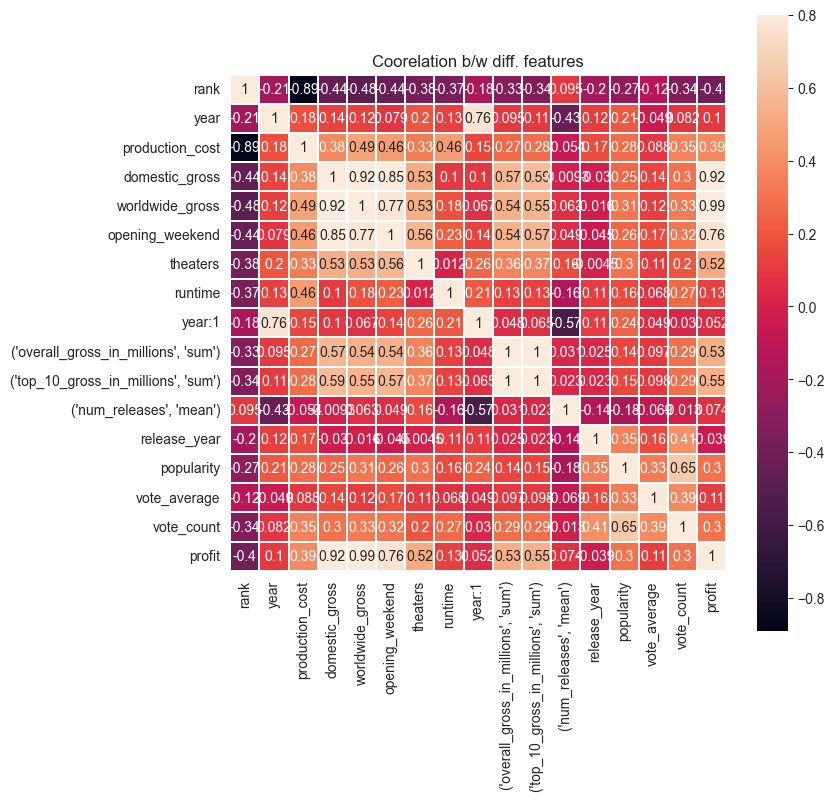

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(data_corr, vmax=.8, linewidth=.01, square=True, annot=True)
plt.title('Coorelation b/w diff. features')



Lengthy runtime movies have higher production cost 

Votes are directly proportional to popularity

There is high correlation b/w Vote Count and popularity

Number of theaters,domestic_gross, worldwide_gross and opening_weekend have direct correlation with each other though in different proportions



<Axes: xlabel='year', ylabel='count'>

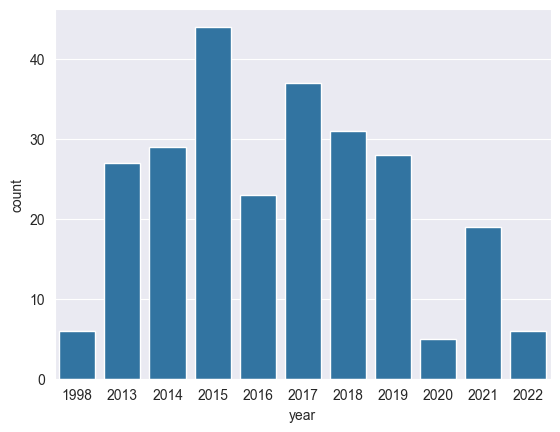

In [37]:
sns.countplot(x='year', data=combinedData)

<Axes: xlabel='year', ylabel='popularity'>

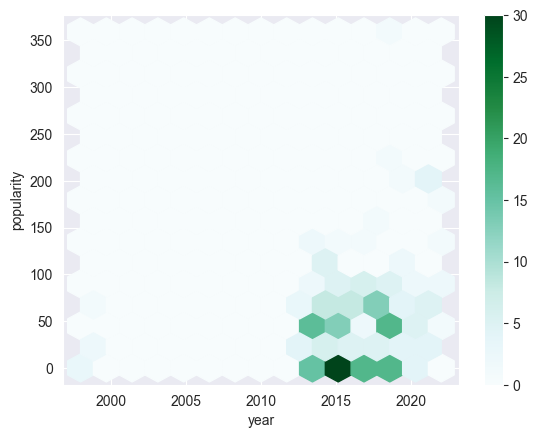

In [38]:
combinedData.plot.hexbin(x='year', y='popularity', gridsize=14)




Critics gave better scores to movies released during recent years

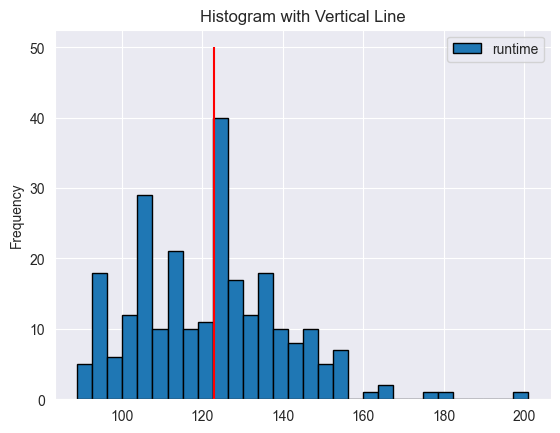

In [39]:
ax = combinedData.plot(kind='hist', y='runtime', bins=30, ec='k', title='Histogram with Vertical Line')
_ = ax.vlines(x=combinedData.runtime.median(), ymin=0, ymax=50, colors='r')

In [40]:
med_runtim = combinedData.runtime.median()
med_runtim

123.0



Most of the movies have average Runtime/ duration of 123 mins.


Correlation Between profit And popularity :  0.2961471576148437


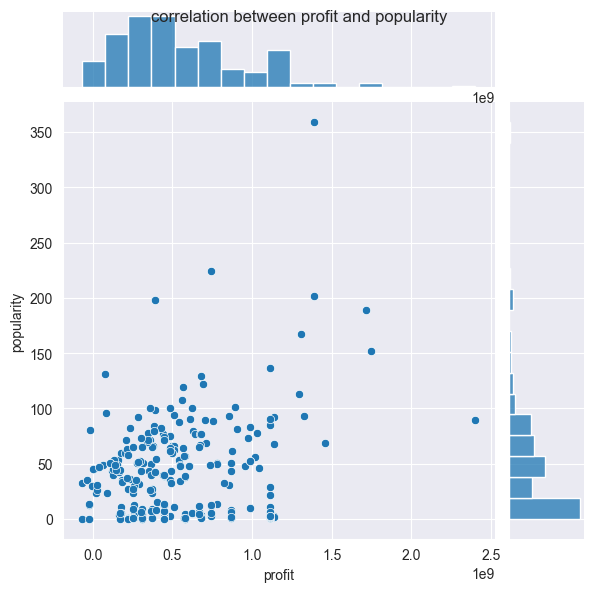

In [41]:
#correlation between profit and popularity
fig1 = sns.jointplot(x = "profit", y = "popularity", kind = "scatter", data = combinedData)
fig1.fig.suptitle('correlation between profit and popularity');

print("Correlation Between profit And popularity : ",data_corr.loc['profit','popularity'])

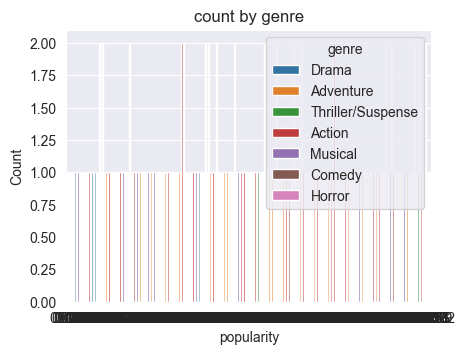

In [42]:
fig = plt.figure(figsize=[16,12]);
ax3 = fig.add_subplot(3, 3, 4);
sns.countplot(data=combinedData,x='popularity',hue='genre');
ax3.set_title('count by genre');
ax3.set_xlabel('popularity');
ax3.set_ylabel('Count');

Correlation Between profit And Budget :  0.3864524209845619


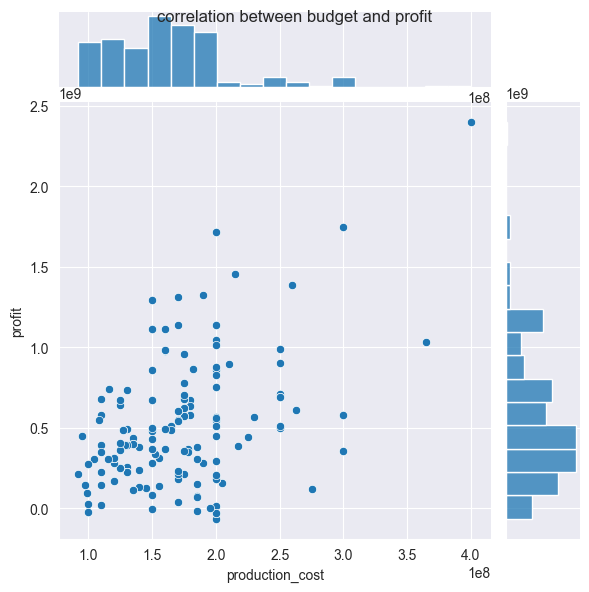

In [43]:
#Correlation between budget and profit

fig2 = sns.jointplot(data = combinedData, x = 'production_cost', y = 'profit', kind = 'scatter')
fig2.fig.suptitle('correlation between budget and profit');
print("Correlation Between profit And Budget : ",data_corr.loc['profit','production_cost'])

Correlation Between vote rating And Budget :  0.08781483295722087


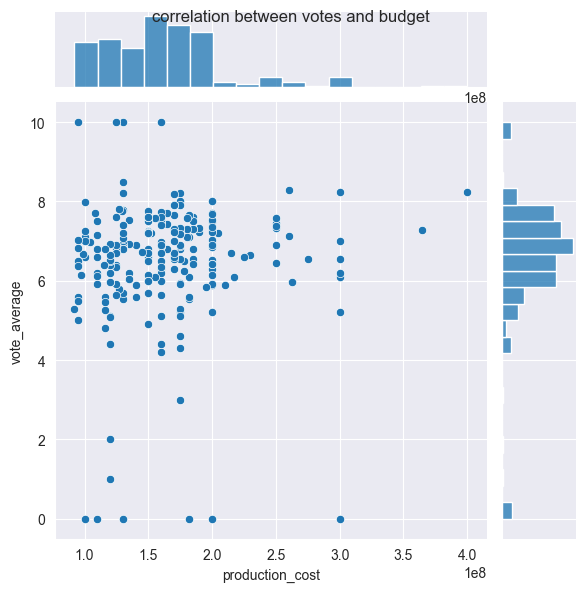

In [44]:
#Correlation between budget and rating

fig3 = sns.jointplot(data = combinedData, x = 'production_cost', y = 'vote_average', kind = 'scatter')
fig3.fig.suptitle('correlation between votes and budget');
print("Correlation Between vote rating And Budget : ",data_corr.loc['vote_average','production_cost'])

Text(0, 0.5, 'Popularity')

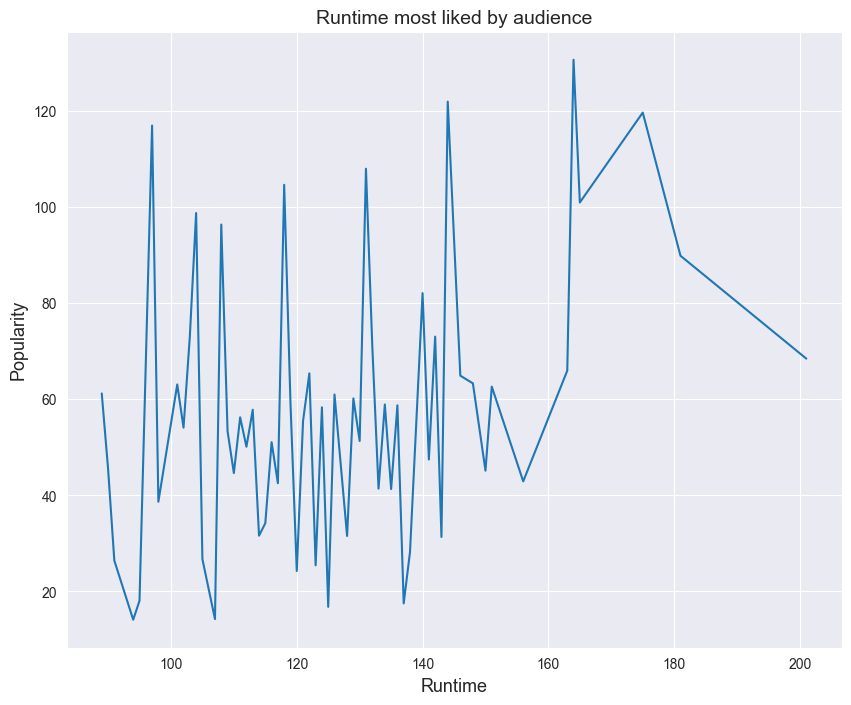

In [45]:
# Rutime film most liked by audience
run_pop=combinedData.groupby('runtime')['popularity'].mean()
run_pop.plot(figsize = (10,8))
#title            
plt.title("Runtime most liked by audience",fontsize=14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Popularity',fontsize = 13)


In [46]:
#max_value
max_run= run_pop.idxmax()
print('Rutime most liked by audience', max_run, 'minutes.')

Rutime most liked by audience 164.0 minutes.


In [47]:
# find movies that make the most and less Vote
min_max(combinedData,'vote_average')

Movie which has highest vote_average :  godzilla
Movie which has lowest vote_average :  spectre


,134,8
rank,174,8
title,godzilla,spectre
year,2014,2015
release_date,2014-05-14,2015-10-06
genre,Action,Action
prod_cost_range_million,156-161,296-301
worldwide_gross_range_million,523-533,873-883
domestic_gross_range_million,195-200,195-200
production_cost,160000000,300000000
domestic_gross,200676069,200074175


In [48]:
#Top Movies based on different features
Top_revenue = combinedData[["title", "worldwide_gross"]]
Top_budget = combinedData[['title','production_cost']]
Top_profit = combinedData[["title", "profit"]]
Top_popularity = combinedData[['title','popularity']]

In [49]:
Top_profit['profit'] = Top_profit.profit/1_000_000
Top_budget['production_cost'] = Top_budget.production_cost/1_000_000
Top_revenue['worldwide_gross'] = Top_revenue.worldwide_gross/1_000_000

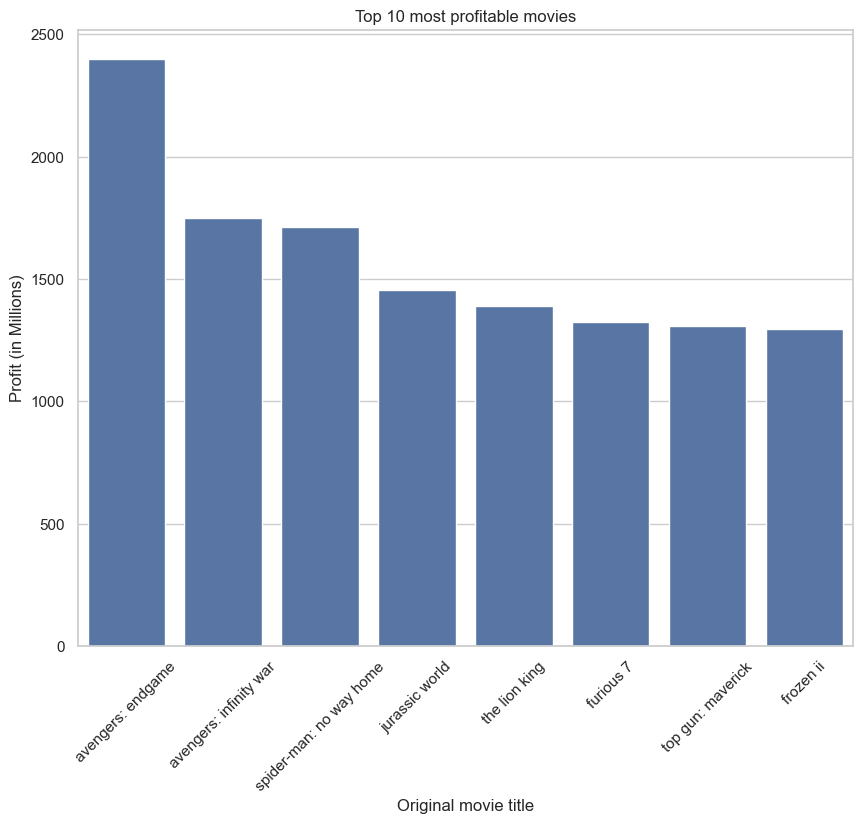

In [50]:
#plot the top 10 most profitable movies
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")
ax = sns.barplot(
    x=Top_profit.sort_values(by = "profit", ascending=False).head(10).title,
    y=Top_profit.sort_values(by = "profit", ascending=False).head(10).profit)

#rotate x-axis' text   
ax.set(xlabel='Original movie title', ylabel='Profit (in Millions)', title = 'Top 10 most profitable movies')
plt.xticks(rotation = 45)
plt.show()

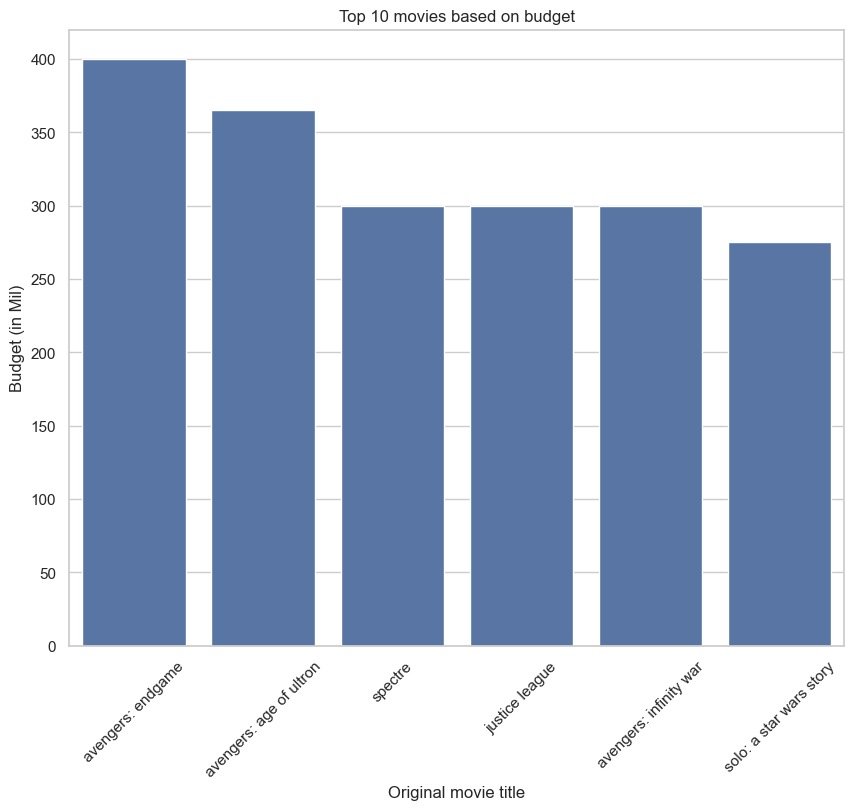

In [51]:
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")

ax = sns.barplot(
    x=Top_budget.sort_values(by = "production_cost", ascending=False).head(10).title,
    y=Top_budget.sort_values(by = "production_cost", ascending=False).head(10).production_cost)

#rotate x-axis' text
plt.xticks(rotation = 45)

ax.set(xlabel='Original movie title', ylabel='Budget (in Mil)', title = 'Top 10 movies based on budget')
plt.show()

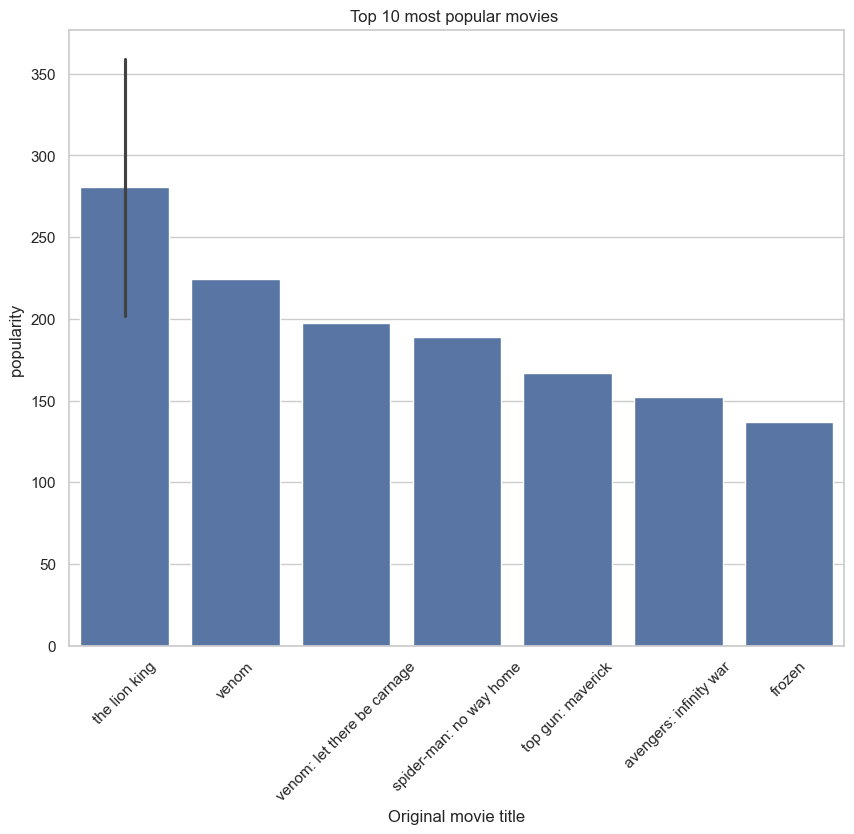

In [52]:
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")

ax = sns.barplot(
    x=Top_popularity.sort_values(by = "popularity", ascending=False).head(10).title,
    y=Top_popularity.sort_values(by = "popularity", ascending=False).head(10).popularity)

#rotate x-axis' text
plt.xticks(rotation = 45)
ax.set(xlabel='Original movie title', ylabel='popularity ', title = 'Top 10 most popular movies ')
plt.show()

In [53]:
df = combinedData.copy()

In [54]:
# drop duplicates
df.drop_duplicates( subset='title',inplace=True)
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

In [55]:
df = df[df.year > 2013]

In [56]:
#Movies which did not make any profit
df[df['profit'] < 0]['title']

52                      onward
54           wonder woman 1984
65           the suicide squad
160    space jam: a new legacy
237            west side story
Name: title, dtype: object

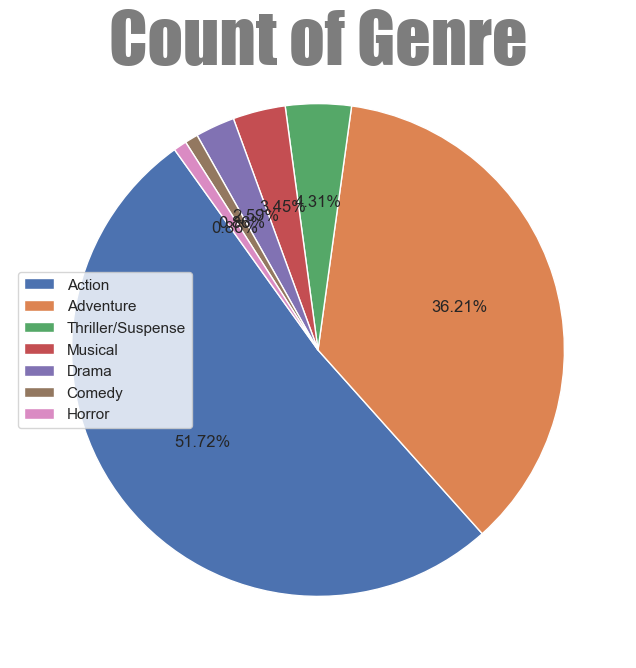

In [57]:
size =df.genre.value_counts().values/10 #List for take sizes
lbl=df.genre.value_counts().index
plt.figure(figsize=(10,8)) #Size of plot
plt.title('Count of Genre',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Title
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #Help for plot
plt.show()

In [58]:
# split the genres  from combined value into single genre value 
df_split = df.assign(genres = df['genres'].str.split('|')).explode('genres')

df_split.head(2)

,rank,title,year,release_date,genre,prod_cost_range_million,worldwide_gross_range_million,domestic_gross_range_million,production_cost,domestic_gross,...,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date:1,original_language,profit
0,1,avengers: endgame,2019,2019-04-23,Action,396-401,2793-2803,855-860,400000000,858373000,...,2019,"Adventure,Science Fiction,Action",89.914,8.247,25738.0,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,en,2397800564
1,3,avengers: age of ultron,2015,2015-04-22,Action,361-366,1393-1403,455-460,365000000,459005868,...,2015,"Action,Adventure,Science Fiction",77.861,7.274,23014.0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,2015-04-22,en,1030316979


In [59]:
#Calculate profitability of each genre
profit_and_genres_df = df_split[['title', 'profit', 'genre']]
mean_profit_vs_genre_df = profit_and_genres_df.groupby(['title','genre']).mean()
mean_profit_vs_genre_df = mean_profit_vs_genre_df.sort_values('profit', ascending=False)
mean_profit_vs_genre_df.head()

,,profit
title,genre,
avengers: endgame,Action,2.397801e+09
avengers: infinity war,Action,1.748360e+09
spider-man: no way home,Action,1.712776e+09
jurassic world,Action,1.454980e+09
the lion king,Adventure,1.387779e+09


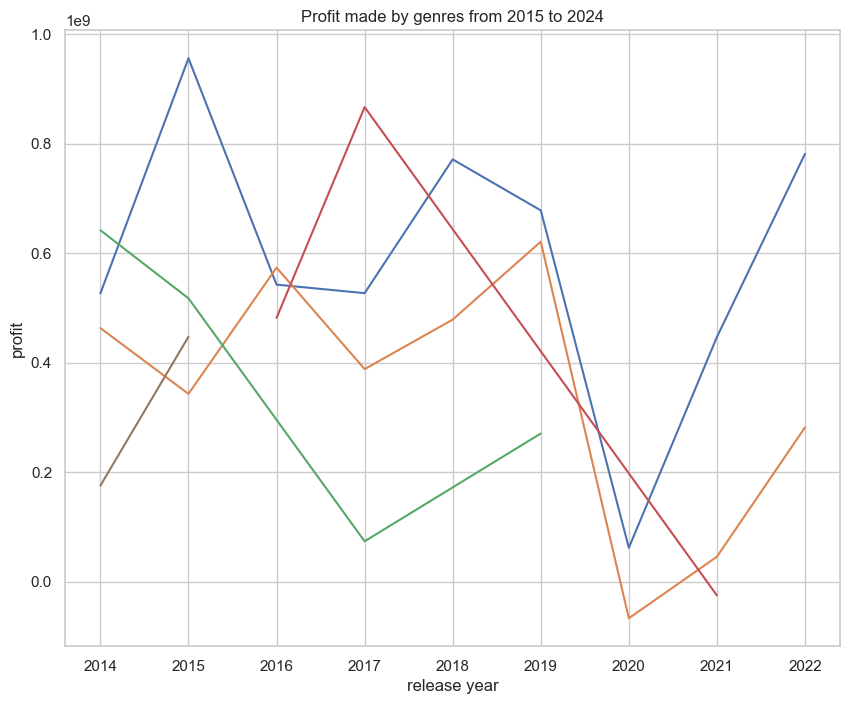

In [60]:
#plot 5 most profitable genres over time

genres_peryear_df = df_split[['title', 'profit', 'genre','year','popularity']]

genre_profit_df = genres_peryear_df.groupby(['genre', 'year'], as_index=False)['profit'].mean()
fig,ax = plt.subplots(figsize=(10,8))

for genres in df['genre'].unique():
    ax.plot(genre_profit_df[genre_profit_df.genre==genres].year,
            genre_profit_df[genre_profit_df.genre==genres].profit,label=genres)

ax.set_xlabel("release year")
ax.set_ylabel("profit")
plt.title('Profit made by genres from 2015 to 2024')
plt.show()

In [61]:
#Calculate popularity of each genre
popular_and_genres_df = df_split[['title', 'profit', 'genre','year','popularity']]
mean_popular_vs_genre_df = popular_and_genres_df.groupby(['title', 'profit', 'genre','year']).mean()
mean_popular_vs_genre_df = mean_popular_vs_genre_df.sort_values('popularity', ascending=False)
mean_popular_vs_genre_df.head()

,,,,popularity
title,profit,genre,year,
the lion king,1387778651,Adventure,2019,201.949
venom: let there be carnage,391600379,Action,2021,197.665
spider-man: no way home,1712775610,Action,2021,189.013
top gun: maverick,1308823595,Action,2022,167.003
avengers: infinity war,1748359754,Action,2018,152.087


In [62]:
## Validating the title field present in dataset

mov = []
for row in cursor.execute("select distinct year from movies"):
    mov.append(row[0])
print("\nTotal number of years present in the combined dataset: {}".format(len(mov)))


Total number of years present in the combined dataset: 11


In [63]:
drop_table("webscraped_with_api")

In [64]:
## Creating another table called webscraped_with_api having web and API datasets alone

sql = """create table if not exists webscraped_with_api as 
         SELECT * from scraped_file web
         left outer join api_file api 
         on api.title = web.movie_title
         ;
    """
cursor.execute(sql)


In [65]:
## Displaying sample records

df_head('webscraped_with_api', 3)

('1917', 2020, 264.18, 234.86, 69.0, '1917', 2019, 'War,History,Thriller,Drama', 34.93, 7.991, 12411.0, '1917', 'At the height of the First World War, two young British soldiers must cross enemy territory and deliver a message that will stop a deadly attack on hundreds of soldiers.', '2019-12-25', 'en')
('2 guns', 2013, 276.28, 235.88, 100.0, '2 guns', 2013, 'Action,Comedy,Crime', 39.118, 6.538, 4131.0, '2 Guns', 'A DEA agent and an undercover Naval Intelligence officer who have been tasked with investigating one another find they have been set up by the mob -- the very organization the two men believe they have been stealing money from.', '2013-08-02', 'en')
('22 jump street', 2014, 374.1, 354.56, 124.0, '22 jump street', 2014, 'Crime,Comedy,Action', 26.212, 6.838, 7920.0, '22 Jump Street', "After making their way through high school (twice), big changes are in store for officers Schmidt and Jenko when they go deep undercover at a local college. But when Jenko meets a kindred spirit o

In [66]:
## Creating dataframe from webscraped_with_api table

sql = "select * from webscraped_with_api;"
webscraped_with_api_df = pd.read_sql_query(sql,conn)

In [67]:
## Displaying sample records
webscraped_with_api_df['release_year'] = webscraped_with_api_df.release_year.fillna(1900)
webscraped_with_api_df["release_year"] = webscraped_with_api_df.release_year.astype('int64')
webscraped_with_api_df.head(5)

,movie_title,year,"('overall_gross_in_millions', 'sum')","('top_10_gross_in_millions', 'sum')","('num_releases', 'mean')",title,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date,original_language
0,1917,2020,264.18,234.86,69.0,1917,2019,"War,History,Thriller,Drama",34.930,7.991,12411.0,1917,"At the height of the First World War, two youn...",2019-12-25,en
1,2 guns,2013,276.28,235.88,100.0,2 guns,2013,"Action,Comedy,Crime",39.118,6.538,4131.0,2 Guns,A DEA agent and an undercover Naval Intelligen...,2013-08-02,en
2,22 jump street,2014,374.10,354.56,124.0,22 jump street,2014,"Crime,Comedy,Action",26.212,6.838,7920.0,22 Jump Street,After making their way through high school (tw...,2014-06-05,en
3,300: rise of an empire,2014,287.72,255.08,110.0,300: rise of an empire,2014,"Action,Drama,War",57.857,6.115,6499.0,300: Rise of an Empire,Greek general Themistocles attempts to unite a...,2014-03-05,en
4,42,2013,233.42,208.96,122.0,42,2013,Drama,17.267,7.200,1793.0,42,"In 1946, Branch Rickey (Harrison Ford), owner ...",2013-04-12,en


In [68]:
## Displaying count and columns

print("Columns present in the dataframe")
print(webscraped_with_api_df.columns)
print("Total number of rows and columns present in the dataframe: {}".format(webscraped_with_api_df.shape))

Columns present in the dataframe
Index(['movie_title', 'year', '('overall_gross_in_millions', 'sum')',
       '('top_10_gross_in_millions', 'sum')', '('num_releases', 'mean')',
       'title', 'release_year', 'genres', 'popularity', 'vote_average',
       'vote_count', 'original_title', 'overview', 'release_date',
       'original_language'],
      dtype='object')
Total number of rows and columns present in the dataframe: (606, 15)


##### Step 7: Creating a table for the combined dataset

In [69]:
## Number of rows and columns present in the dataframe

combinedData.head()

,rank,title,year,release_date,genre,prod_cost_range_million,worldwide_gross_range_million,domestic_gross_range_million,production_cost,domestic_gross,...,release_year,genres,popularity,vote_average,vote_count,original_title,overview,release_date:1,original_language,profit
0,1,avengers: endgame,2019,2019-04-23,Action,396-401,2793-2803,855-860,400000000,858373000,...,2019,"Adventure,Science Fiction,Action",89.914,8.247,25738.0,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,en,2397800564
1,3,avengers: age of ultron,2015,2015-04-22,Action,361-366,1393-1403,455-460,365000000,459005868,...,2015,"Action,Adventure,Science Fiction",77.861,7.274,23014.0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,2015-04-22,en,1030316979
2,5,avengers: infinity war,2018,2018-04-25,Action,296-301,2043-2053,675-680,300000000,678815482,...,2018,"Adventure,Action,Science Fiction",152.087,8.242,29869.0,Avengers: Infinity War,As the Avengers and their allies have continue...,2018-04-25,en,1748359754
3,7,justice league,2017,2017-11-13,Action,296-301,653-663,225-230,300000000,229024295,...,2017,"Action,Adventure,Science Fiction",71.332,6.100,12953.0,Justice League,Fuelled by his restored faith in humanity and ...,2017-11-15,en,355945209
4,8,spectre,2015,2015-10-06,Action,296-301,873-883,195-200,300000000,200074175,...,1977,"TV Movie,Horror",2.615,6.200,10.0,Spectre,An occult criminologist investigates a busines...,1977-05-21,en,579500760


In [70]:
webData_df.columns

MultiIndex([('overall_gross_in_millions',  'sum'),
            ( 'top_10_gross_in_millions',  'sum'),
            (             'num_releases', 'mean')],
           )

In [71]:
all_years = web_scraped_df['year']
last_ten_years = web_scraped_df[all_years > 2000]


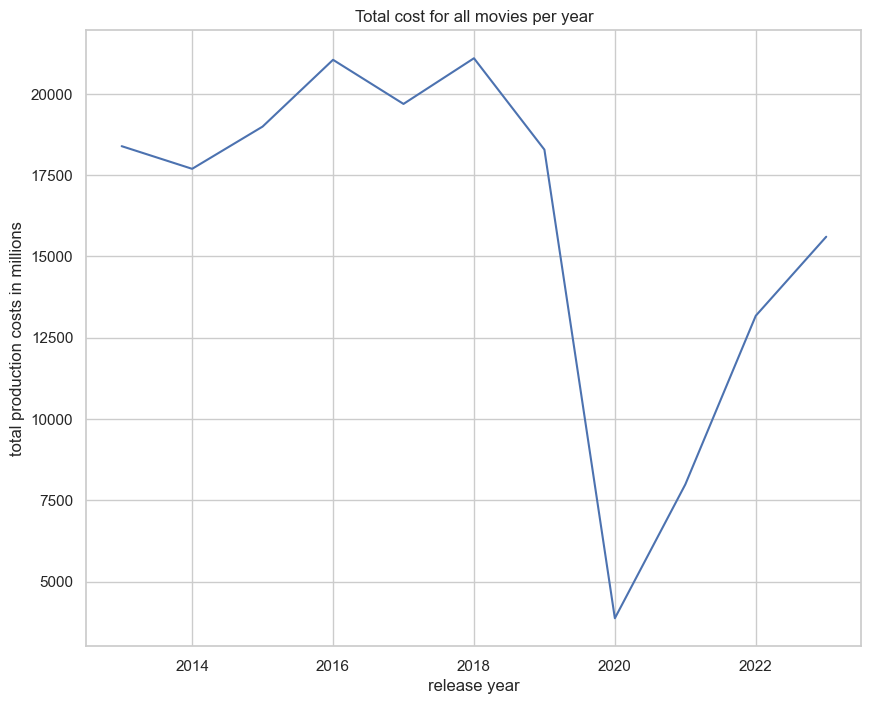

The movie industry made the highest production cost in 2018 .


In [72]:

#calculate Total Profits gained for all movies per year in the last 20 years

production_per_year = last_ten_years.groupby(['year'])['overall_gross_in_millions'].sum()
ax = production_per_year.plot(stacked=True, figsize=(10,8));
ax.set(xlabel='release year', ylabel='total production costs in millions', title = 'Total cost for all movies per year')
plt.show()

max_production_cost= production_per_year.idxmax()

print('The movie industry made the highest production cost in', max_production_cost,'.')

##### Step 8: Pictorial representation of the data

##### Histograms

array([[<Axes: title={'center': '2014'}>,
        <Axes: title={'center': '2015'}>,
        <Axes: title={'center': '2016'}>],
       [<Axes: title={'center': '2017'}>,
        <Axes: title={'center': '2018'}>,
        <Axes: title={'center': '2019'}>],
       [<Axes: title={'center': '2020'}>,
        <Axes: title={'center': '2021'}>,
        <Axes: title={'center': '2022'}>]], dtype=object)

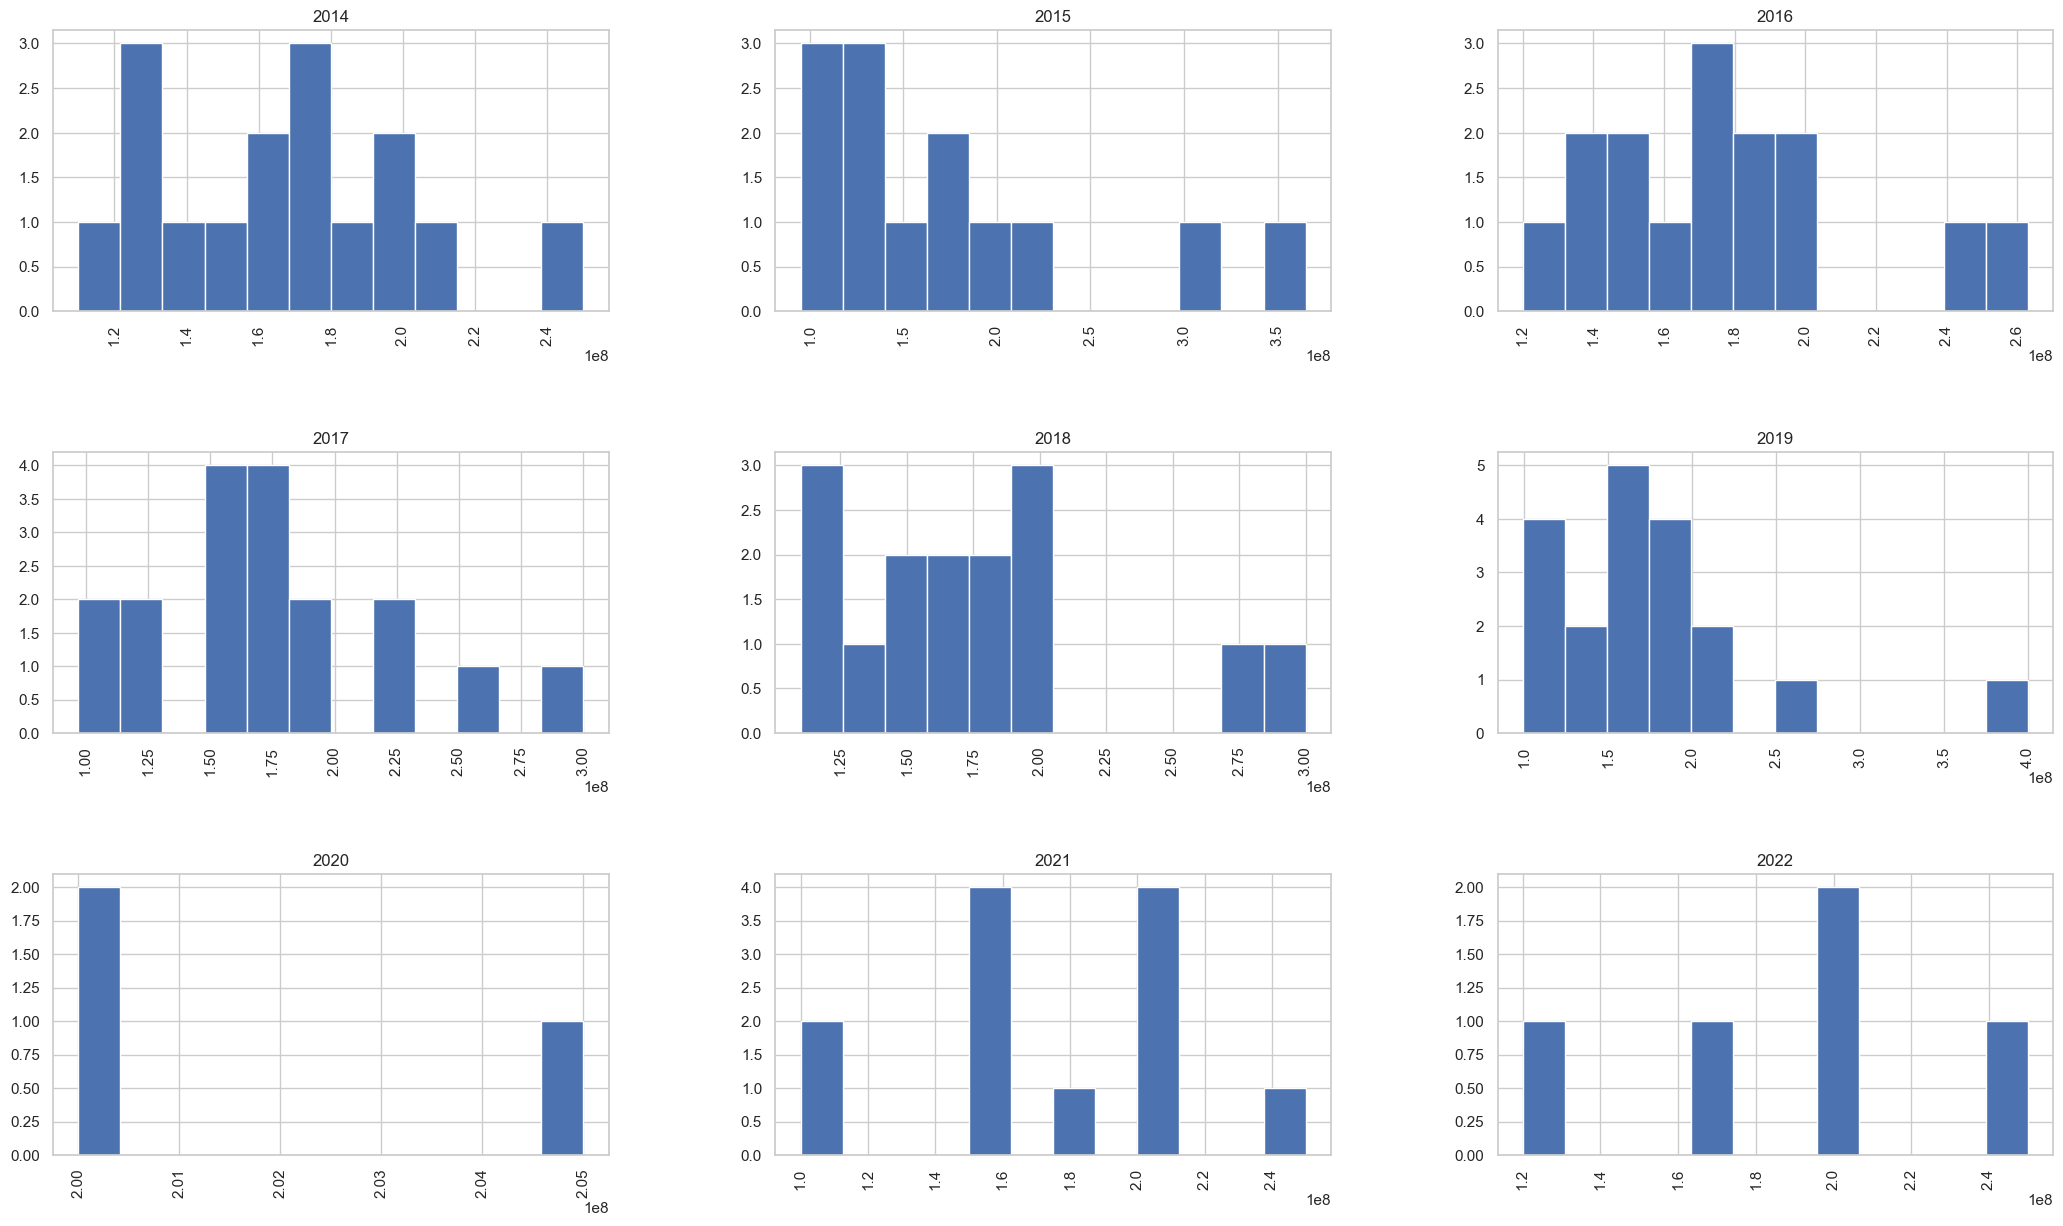

In [73]:
## Histograms and line chart to analyze the production cost


df.hist(by='year', column='production_cost',figsize=[25,15], bins=12)

In [74]:
dff =web_scraped_df.groupby(['movie_title','occasion'])['overall_gross_in_millions'].sum()
dff= dff.reset_index()

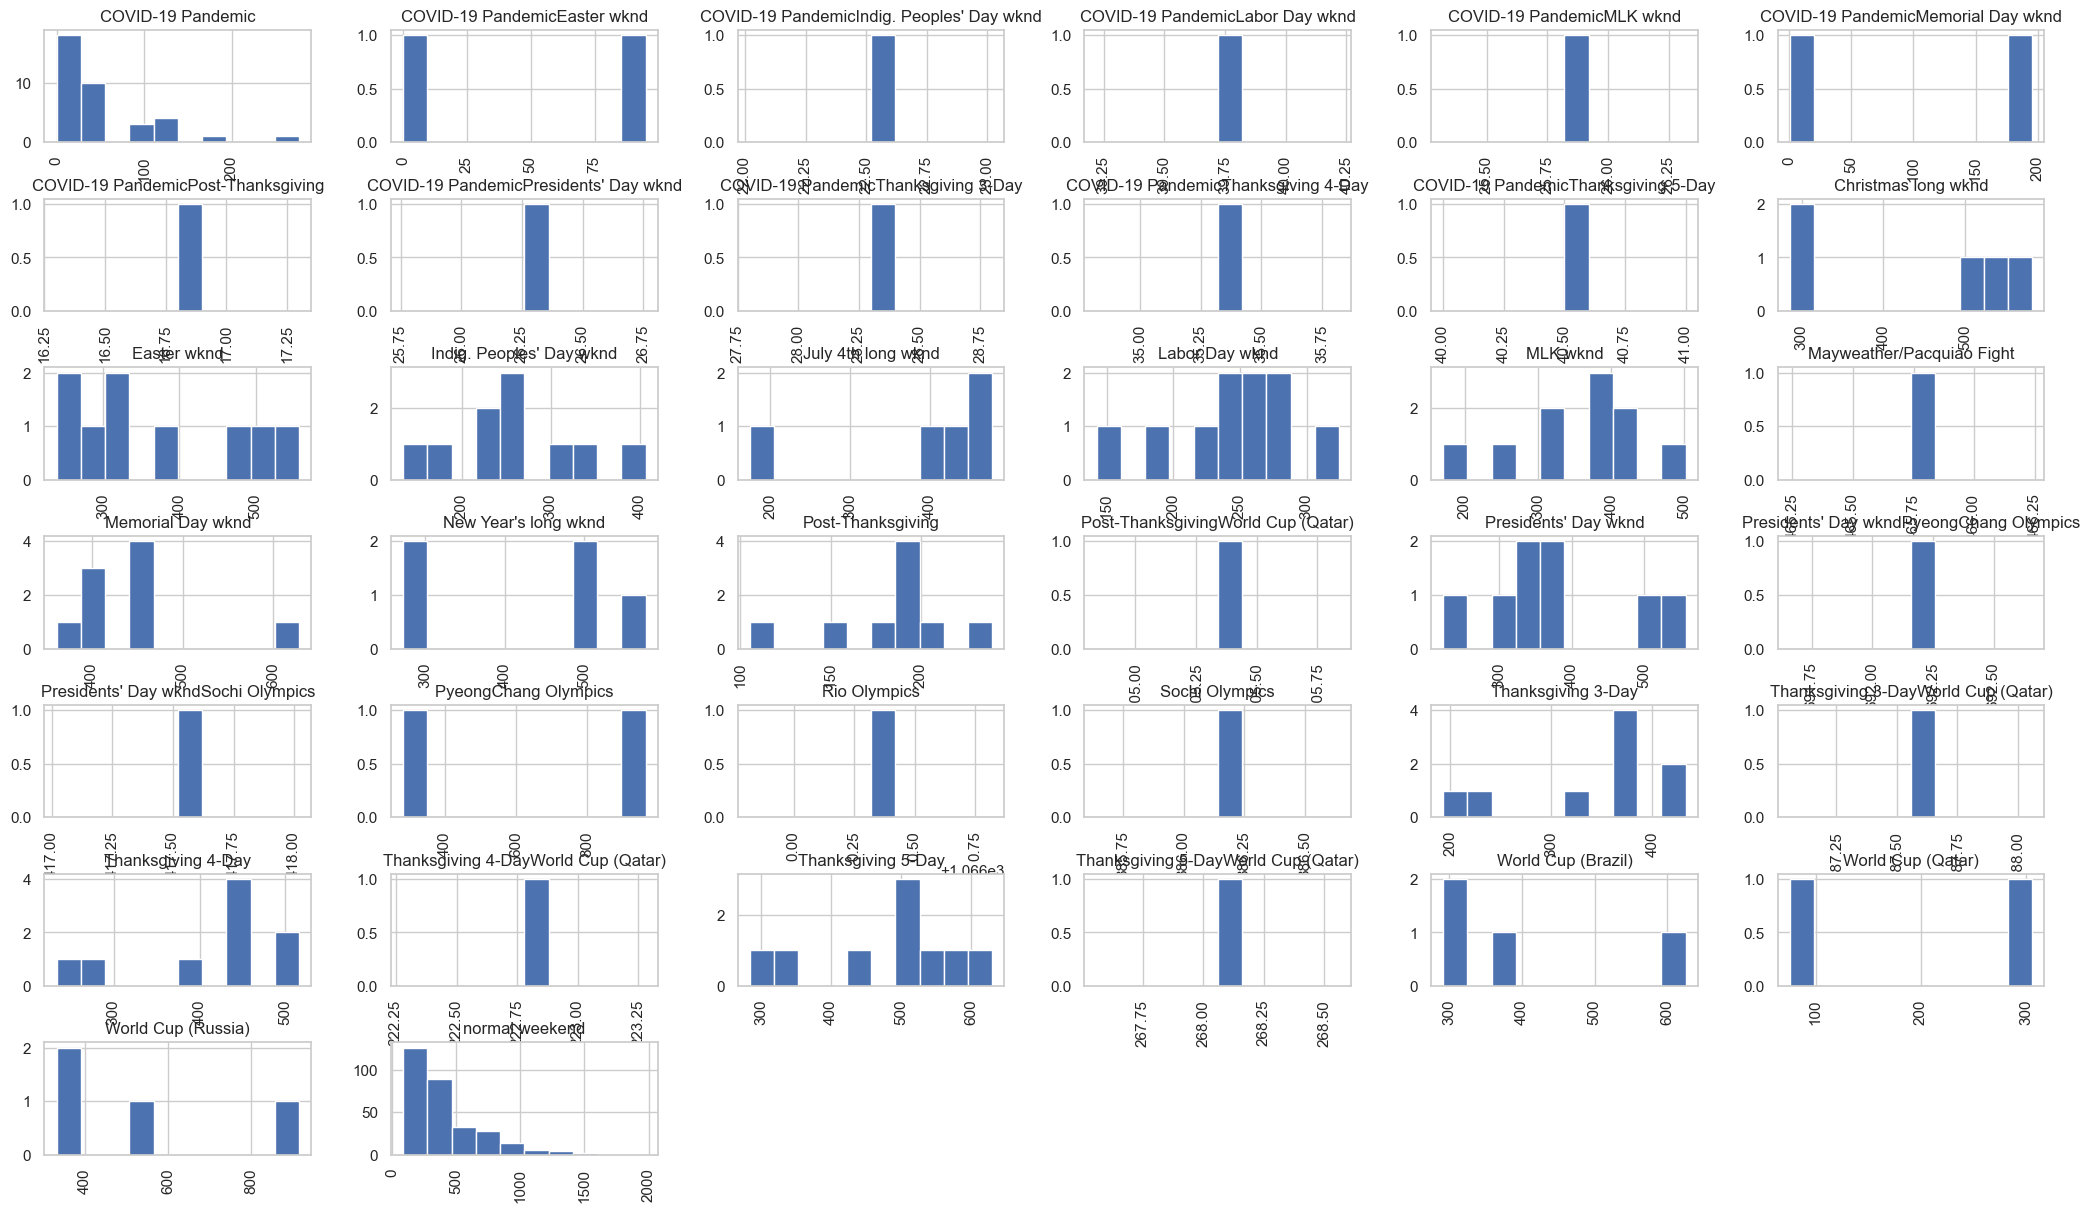

In [76]:
## Creating histograms for cost present in the dataset

dff.hist(by='occasion', column='overall_gross_in_millions', figsize=[25,15]);

#### Summary

This project gave me a different perspective on how the movies have evolved be it the production cost or the number of theatres. I learned a lot especially in pandas where one of the challenges I faced was to covert the dollar amount to a range. I had to go over a cauldron of python commands to get it accomplished. 
 
Right from figuring out the common key upto ethical implications was not an easy route. In the end, I am fascinated how these milestones stitch together to say the story.

Speaking about WebScraping I could not fathom the data scraping mechanism. It lead me to understand what the value of each html tag and I did learn about the soup library. 

One of the challenges with api was to aquire the api keys. I also had the daunting task to figure out which movie site provides the details required for the project. I was also worried if the api had a rate limit which will limit my data retrievals.

Overall, this was very effective project where I learnt that data is present in many forms. It is easier to say,let the data speak to itself although there is so much of ground work that need to be performed for visualization. 


